In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import numpy.random as rn
import pandas as pd
from scipy.stats import multivariate_normal
import re
import scipy.sparse
from collections import defaultdict
import operator


import matplotlib.pyplot as plt
%matplotlib inline

## Gaussian Discriminant Analysis

In [161]:
class GDA():
    """ Implementation of Gaussian Discriminant Analysis for multiclass"""
    
    def __init__(self, x, y):
        self.x = x.values
        self.y = y.values
        self.__labels = np.unique(y)
        self.__phi = np.zeros((len(np.unique(y)), 1))
        self.__mu = np.zeros((len(np.unique(y)), x.shape[1]))
        self.__sigma = 0
        
    def get_mu(self):
        for i in range(len(self.__labels)):
            indexes = np.flatnonzero(self.y == self.__labels[i])
            self.__mu[i] = (self.x[indexes]).mean(axis=0)
        return self.__mu
    
    def get_sigma(self):
        n = len(self.y)

        for i in range(len(self.x)):
            if self.y[i] == 0:
                diff = self.x[i].reshape(-1,1) - self.__mu[0].reshape(-1,1)
                self.__sigma += np.dot(diff, diff.T)
            elif self.y[i] == 1:
                diff = self.x[i].reshape(-1,1) - self.__mu[1].reshape(-1,1)
                self.__sigma += np.dot(diff, diff.T)
            elif self.y[i] == 2:
                diff = self.x[i].reshape(-1,1) - self.__mu[2].reshape(-1,1)
                self.__sigma += np.dot(diff, diff.T)
            elif self.y[i] == 3:
                diff = self.x[i].reshape(-1,1) - self.__mu[3].reshape(-1,1)
                self.__sigma += np.dot(diff, diff.T)
            elif self.y[i] == 4:
                diff = self.x[i].reshape(-1,1) - self.__mu[4].reshape(-1,1)
                self.__sigma += np.dot(diff, diff.T)
            elif self.y[i] == 5:
                diff = self.x[i].reshape(-1,1) - self.__mu[5].reshape(-1,1)
                self.__sigma += np.dot(diff, diff.T)
            elif self.y[i] == 6:
                diff = self.x[i].reshape(-1,1) - self.__mu[6].reshape(-1,1)
                self.__sigma += np.dot(diff, diff.T)
            elif self.y[i] == 7:
                diff = self.x[i].reshape(-1,1) - self.__mu[7].reshape(-1,1)
                self.__sigma += np.dot(diff, diff.T)
            elif self.y[i] == 8:
                diff = self.x[i].reshape(-1,1) - self.__mu[8].reshape(-1,1)
                self.__sigma += np.dot(diff, diff.T)
            else:
                diff = self.x[i].reshape(-1,1) - self.__mu[9].reshape(-1,1)
                self.__sigma += np.dot(diff, diff.T)
                
        return self.__sigma/n
   
    def get_phi(self):
        labels = np.unique(self.y)
        phi = np.zeros(len(labels))
        for i,l in enumerate(labels):
            phi[i] = (self.y == l).mean()
        return phi
    
    def get_px(self, x, mu, sigma):
        dim = len(mu)
        c = (1./np.sqrt(abs((2*np.pi)**(dim) * (np.linalg.det(sigma)))))
        exp = np.dot((x.reshape(-1,1)- mu.reshape(-1,1)).T,np.dot(np.linalg.inv(sigma),(x.reshape(-1,1)- mu.reshape(-1,1))))
        return c * np.exp(-0.5 * exp)
    
    def predict(self,x, mu, sigma, phi):
        x = x.values
        y_hat = np.zeros(len(x))
        for i in range(len(x)):
            prob = []
            for c in range(len(phi)):
                r = self.get_px(x[i], mu[c], sigma) * phi[c]
                prob.append(r)
            y_hat[i] = np.argmax(prob)
            
        return y_hat
    
    def accuracy(self, y_hat, y_test):
        return (y_test == y_hat).mean() * 100
    

## Softmax Regression

In [162]:
class SoftMax():
    
    def __init__(self, X, y):
        self.X = X.values
        self.y = y.values
#         self.alpha = alpha
#         self.n_iter = n_iter
        self.theta = np.zeros((X.shape[1], len(np.unique(y))))
        
    def oneHotIt(self, Y):
        m = Y.shape[0]
        OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
        OHX = np.array(OHX.todense()).T
        return OHX
    
    def hypothesis(self, x):
        z = np.exp(np.dot(x, self.theta))
        return z/z.sum(axis=1, keepdims=True)


    def cost_function(self):
        p = self.hypothesis(self.X)
        cost = 0
        for i in range(self.X.shape[0]):
            for k in range(len(np.unique(self.y))):
                if self.y[i] == k:
                    cost += np.log(p[i, k])
        return - (1/self.X.shape[0]) * cost

    def compute_grad(self):
        p = self.hypothesis(self.X)
        return (1/self.X.shape[0]) * np.dot(self.X.T, (p - self.oneHotIt(self.y)))
#         grad = np.zeros((len(np.unique(self.y)), self.X.shape[1]))
#         for c in range(len(np.unique(self.y))):
#             d = 0
#             for i in range(self.X.shape[0]):
#                 r = (1 if self.y == c else 0) - p[i,c]
#                 d += self.X[i] * r
#             grad[c] = d
#         return grad/self.X.shape[0]
            
    
    def fit_softmax(self, eta, n_inter):
        losses = np.zeros(n_iter)
        for i in range(n_iter):
            loss = self.cost_function()
            losses[i] = loss
            self.theta = self.theta - eta * self.compute_grad()
        return self.theta, loss, losses
    
    def predict(self, x):
        pred = self.hypothesis(x)
        return np.argmax(pred, axis=1)
    
    def accuracy(self, y_true, y_hat):
        return (y_true == y_hat).mean() * 100

## Naive Bayes

In [163]:
class NaiveBayes(object):
    def __init__(self, n_gram=1, printing=False):
        self.prior = defaultdict(int)
        self.logprior = {}
        self.bigdoc = defaultdict(list)
        self.loglikelihoods = defaultdict(defaultdict)
        self.V = []
        self.n = n_gram

    def compute_prior_and_bigdoc(self, training_set, training_labels):
        
        for x, y in zip(training_set, training_labels):
            all_words = x.split(" ")
            if self.n == 1:
                grams = all_words
            else:
                grams = self.words_to_grams(all_words)

            self.prior[y] += len(grams)
            self.bigdoc[y].append(x)

    def compute_vocabulary(self, documents):
        vocabulary = set()

        for doc in documents:
            for word in doc.split(" "):
                vocabulary.add(word.lower())

        return vocabulary

    def count_word_in_classes(self):
        counts = {}
        for c in list(self.bigdoc.keys()):
            docs = self.bigdoc[c]
            counts[c] = defaultdict(int)
            for doc in docs:
                words = doc.split(" ")
                for word in words:
                    counts[c][word] += 1

        return counts

    def train(self, training_set, training_labels, alpha=1):
        # Get number of documents
        N_doc = len(training_set)

        # Get vocabulary used in training set
        self.V = self.compute_vocabulary(training_set)

        # Create bigdoc
        for x, y in zip(training_set, training_labels):
            self.bigdoc[y].append(x)

        # Get set of all classes
        all_classes = set(training_labels)

        # Compute a dictionary with all word counts for each class
        self.word_count = self.count_word_in_classes()

        # For each class
        for c in all_classes:
            # Get number of documents for that class
            N_c = float(sum(training_labels == c))

            # Compute logprior for class
            self.logprior[c] = np.log(N_c / N_doc)

            # Calculate the sum of counts of words in current class
            total_count = 0
            for word in self.V:
                total_count += self.word_count[c][word]

            # For every word, get the count and compute the log-likelihood for this class
            for word in self.V:
                count = self.word_count[c][word]
                self.loglikelihoods[c][word] = np.log((count + alpha) / (total_count + alpha * len(self.V)))
    
    def maxDict(self, dic):
        return max(dic.items(), key=operator.itemgetter(1))[0]

    
    
    def predict(self, test_doc):
        sums = { 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
        for c in self.bigdoc.keys():
            sums[c] = self.logprior[c]
            words = test_doc.split(" ")
            for word in words:
                if word in self.V:
                    sums[c] += self.loglikelihoods[c][word]
        return sums
    def get_prediction(self, d_test):
        predictions = []
        for example in d_test:
            result = self.predict(example)
            predictions.append(self.maxDict(result))
        return predictions
    
    def accuracy(self, y_test, yhat):
        return (y_test == yhat).mean() * 100

In [164]:
def split(x, y, n):
    return train_test_split(x.iloc[:n], y.iloc[:n], test_size=0.3)#, shuffle=True, random_state=42, stratify=y.iloc[:n])

## Exploration Data Analysis

In [165]:
# Load data set
data = pd.read_csv('DrugData.csv')

In [166]:
data = data.drop('Unnamed: 0', axis=1)

In [167]:
data.dropna(inplace=True)

In [168]:
data.rating = data.rating.map({1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 10:9})

In [169]:
# Visualization of top first five rows
data.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,sentiment
0,enalapril,3,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",0
1,ortho-tri-cyclen,0,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",0
2,ponstel,9,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,1
3,prilosec,2,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,0
4,lyrica,1,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,0


Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

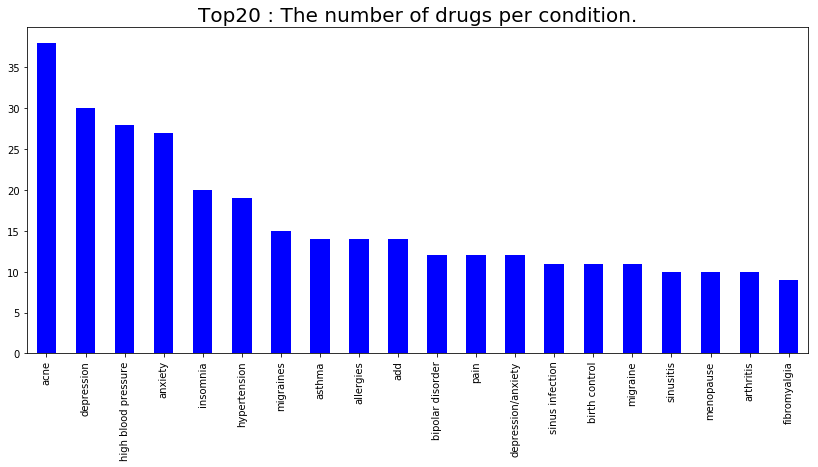

In [170]:
condition_dn = data.groupby(['condition'])['urlDrugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="blue")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

Text(0.5, 1.0, 'Count of rating values')

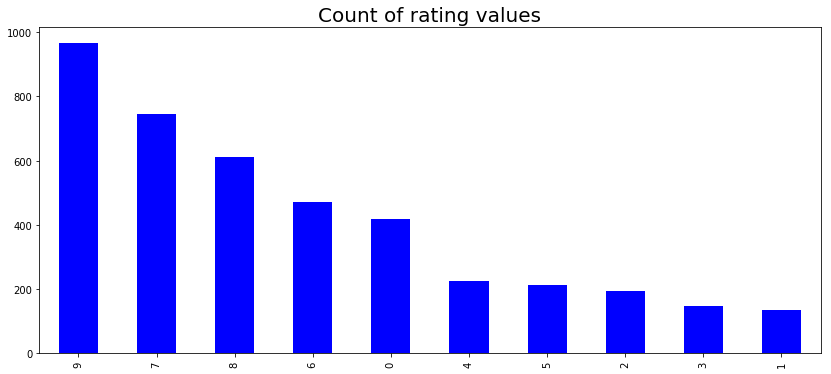

In [171]:
rating = data.rating.value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10, color="blue")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

Most people choose four values: 9, 7, 8, 6,0, and the number of 9 is the most choose than the others. We can see that the percentage of positives is higher than negative, and people's reactions are extreme.

Text Preprocessing

In [172]:
!pip3 install nltk

In [173]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [174]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/aimsgh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [175]:
stops = set(stopwords.words('english'))

In [176]:
stemmer = SnowballStemmer('english')

In [177]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [178]:
data['condition'] = data['condition'].apply(review_to_words)

In [179]:
%time data.benefitsReview = data.benefitsReview.apply(review_to_words)
%time data.sideEffectsReview = data.sideEffectsReview.apply(review_to_words)

CPU times: user 976 ms, sys: 20 ms, total: 996 ms
Wall time: 953 ms
CPU times: user 884 ms, sys: 16 ms, total: 900 ms
Wall time: 894 ms


In [180]:
%time data.commentsReview = data.commentsReview.apply(review_to_words)

/usr/lib/python3/dist-packages/bs4/__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/lib/python3/dist-packages/bs4/__init__.py:272: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


CPU times: user 1.25 s, sys: 20 ms, total: 1.27 s
Wall time: 1.24 s


In [181]:
%time data.urlDrugName = data.urlDrugName.apply(review_to_words)

CPU times: user 219 ms, sys: 0 ns, total: 219 ms
Wall time: 218 ms


In [182]:
data.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,sentiment
0,enalapril,3,Highly Effective,Mild Side Effects,manag congest heart failur,slow progress left ventricular dysfunct overt ...,cough hypotens proteinuria impot renal failur ...,monitor blood pressur weight ass resolut fluid,0
1,ortho tri cyclen,0,Highly Effective,Severe Side Effects,birth prevent,although type birth control con pros help cram...,heavi cycl cramp hot flash fatigu long last cy...,hate birth control would suggest anyon,0
2,ponstel,9,Highly Effective,No Side Effects,menstrual cramp,use cramp bad would leav ball bed least day po...,heavier bleed clot normal,took pill onset menstrual cramp everi hour too...,1
3,prilosec,2,Marginally Effective,Mild Side Effects,acid reflux,acid reflux went away month day drug heartburn...,constip dri mouth mild dizzi would go away med...,given prilosec prescript dose mg per day medic...,0
4,lyrica,1,Marginally Effective,Severe Side Effects,fibromyalgia,think lyrica start help pain sideeffect sever ...,felt extrem drug dopey could drive med also ex...,see,0


In [183]:
# droping targe variable
X = data.drop(['rating', 'sentiment'], axis=1)
y = data.rating

In [184]:
dd1 = X.effectiveness+' '+X.sideEffects +' '+X.benefitsReview +' '+X.condition #+ ' '+X.commentsReview

In [185]:
#count_vector = CountVectorizer(binary=True, stop_words='english')
vectorizer = CountVectorizer(min_df=0.1, max_df=.8, stop_words='english')
train_v = vectorizer.fit_transform(dd1)

In [186]:
train_vec = pd.DataFrame(train_v.toarray(), columns=vectorizer.get_feature_names())

In [187]:
eta= 0.01 # learning rate
n_iter = 1000

# Comparison of the three algorithms

I have implemented a multiclass model for each algorithm. My target variable is rating column. It contains 10 different classes.

# Test on 10 percent of the data

In [188]:
n10 = int(len(train_vec) * 10/100)
x_train, x_test, y_train, y_test = split(train_vec, y, n10)

x_1, x_2, y_1, y_2 = split(dd1, y, n10)

### Gaussian Discriminant Analysis (GDA)

In [189]:
gda = GDA(x_train, y_train)

In [190]:
mu = gda.get_mu()
sigma = gda.get_sigma()

phi = gda.get_phi()
#sigm = sigma + np.eye(sigma.shape[1])*0.1
pred_gda = gda.predict(x_test, mu, sigma, phi)

In [191]:
gda_acc_10 = gda.accuracy(pred_gda, y_test)

In [192]:
gda_acc_10

45.96774193548387

### Naive Bayes

In [193]:
nb = NaiveBayes()

In [194]:
nb.train(x_1, y_1)
pred_nb = nb.get_prediction(x_2)
nb_acc_10 = nb.accuracy(y_2, pred_nb)

In [195]:
nb_acc_10

24.193548387096776

### Softmax Regression

In [196]:
softmax = SoftMax(x_train, y_train)

In [197]:
# Fitting softmax model
result = softmax.fit_softmax(eta, n_iter)

In [198]:
# Predictions
predictions = softmax.predict(x_test)

# Prediction Accuracy
soft_acc_10 = softmax.accuracy(y_test.values, predictions)

In [199]:
soft_acc_10

34.67741935483871

For our first chunck of the data which represent 10% of it. The remark that we can do here is that:

* Naive Bayes approach underperformed. Maybe it's suffered of problem of losing context of words and not preserving the order of the rating sentiment
* Multiclass Logistic regression (Softmax) and GDA outperformed both. Maybe due to details such as countvectorizer/(TF-IDF) correctly weighing the indicative words.

Pictorically as in the figure below 
    - 

In [200]:
accuracies_10 = [gda_acc_10, nb_acc_10, soft_acc_10]
models = ['GDA', 'Naive Bayes', 'Softmax']

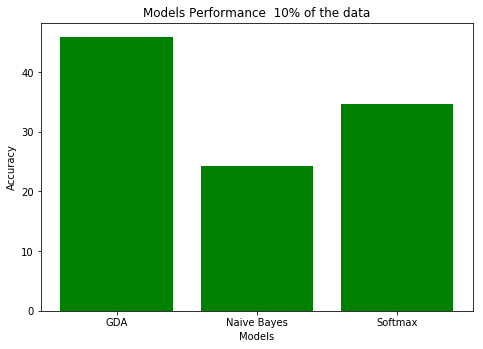

In [201]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models, accuracies_10, color = 'green')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Models Performance  10% of the data')
plt.show()

# Test on 30 percent of the data

In [202]:
n30 = int(len(train_vec) * 30/100)
x_train_30, x_test_30, y_train_30, y_test_30 = split(train_vec, y, n30)

x_10, x_20, y_10, y_20 = split(dd1, y, n30)

### GDA

In [203]:
gda = GDA(x_train_30, y_train_30)
mu = gda.get_mu()
mu = gda.get_mu()
sigma = gda.get_sigma()
phi = gda.get_phi()
pred_gda = gda.predict(x_test_30, mu, sigma, phi)
gda_acc_30 = gda.accuracy(pred_gda, y_test_30)

In [204]:
gda_acc_30

38.97849462365591

### Naive Bayes

In [205]:
nb.train(x_10, y_10)
pred_nb_30 = nb.get_prediction(x_20)
nb_acc_30 = nb.accuracy(y_20, pred_nb_30)

In [206]:
nb_acc_30

34.13978494623656

### Softmax Regression

In [207]:
softmax = SoftMax(x_train_30, y_train_30)

In [208]:
# Fitting softmax model
result = softmax.fit_softmax(eta, n_iter)

In [209]:
# Predictions
predictions_30 = softmax.predict(x_test_30)

# Prediction Accuracy
soft_acc_30 = softmax.accuracy(y_test_30, predictions_30)

In [210]:
soft_acc_30

38.97849462365591

## For the second chunck of the data which represent 30% of it:
* The Naive Bayes approach outperformed the other models GDA and Softmax. The Softmax got an accuracy slightly higher than the GDA. This maybe because of the fact that Naive Bayes tends to perform well on small size of data set.

Pictorically as in the figure below 

In [211]:
accuracies_30 = [gda_acc_30, nb_acc_30, soft_acc_30]

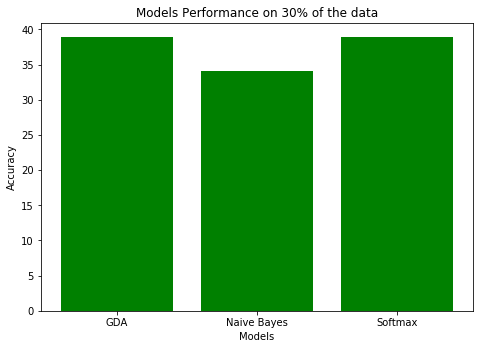

In [212]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models, accuracies_30, color = 'green')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Models Performance on 30% of the data')
plt.show()

# Test on 60 percent of the data

In [213]:
n60 = int(len(train_vec) * 60/100)
x_train_60, x_test_60, y_train_60, y_test_60 = split(train_vec, y, n60)

x_100, x_200, y_100, y_200 = split(dd1, y, n60)

### GDA

In [214]:
gda = GDA(x_train_60, y_train_60)
mu = gda.get_mu()
mu = gda.get_mu()
sigma = gda.get_sigma()
phi = gda.get_phi()
pred_gda = gda.predict(x_test_60, mu, sigma, phi)
gda_acc_60 = gda.accuracy(pred_gda, y_test_60)

In [215]:
gda_acc_60

42.06989247311828

### Naive Bayes

In [216]:
nb.train(x_100, y_100)
pred_nb_60 = nb.get_prediction(x_200)
nb_acc_60 = nb.accuracy(y_200, pred_nb_60)

In [217]:
nb_acc_60

34.946236559139784

### Softmax Regression

In [218]:
softmax = SoftMax(x_train_60, y_train_60)

In [219]:
# Fitting softmax model
result = softmax.fit_softmax(eta, n_iter)

In [220]:
# Predictions
predictions_60 = softmax.predict(x_test_60)

# Prediction Accuracy
soft_acc_60 = softmax.accuracy(y_test_60, predictions_60)

In [221]:
soft_acc_60

39.91935483870967

The third chunck of the data which represent 60% of it. The remark that we can do here is that:

* Here Naive Bayes model slightly perform less than the one in the 30% test. It achieves here the same performance as Softmax. This situation maybe is due to the fact that Softmax is getting enough data to learn.
* GDA outperformed all of them. It might be explain also due to enough data his getting.

Pictorically as in the figure below 
    - 

In [222]:
accuracies_60 = [gda_acc_60, nb_acc_60, soft_acc_60]

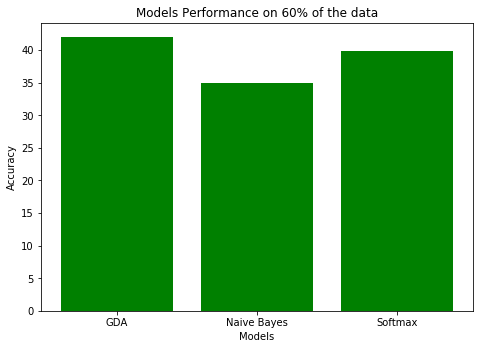

In [223]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models, accuracies_60, color = 'green')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Models Performance on 60% of the data')
plt.show()

# Test on 100 percent of the data

In [224]:
n100 = int(len(train_vec) * 100/100)
x_train_100, x_test_100, y_train_100, y_test_100 = split(train_vec, y, n100)

x_11, x_22, y_11, y_22 = split(dd1, y, n100)

### GDA

In [225]:
gda = GDA(x_train_100, y_train_100)
mu = gda.get_mu()
mu = gda.get_mu()
sigma = gda.get_sigma()
phi = gda.get_phi()
pred_gda = gda.predict(x_test_100, mu, sigma, phi)
gda_acc_100 = gda.accuracy(pred_gda, y_test_100)

In [226]:
gda_acc_100

44.06779661016949

### Naive Bayes

In [227]:
nb.train(x_11, y_11)
pred_nb_100 = nb.get_prediction(x_22)
nb_acc_100 = nb.accuracy(y_22, pred_nb_100)

In [228]:
nb_acc_100

40.03228410008071

### Softmax Regression

In [229]:
softmax = SoftMax(x_train_100, y_train_100)

In [230]:
# Fitting softmax model
result = softmax.fit_softmax(eta, n_iter)

In [231]:
# Predictions
predictions_100 = softmax.predict(x_test_100)

# Prediction Accuracy
soft_acc_100 = softmax.accuracy(y_test_100, predictions_100)

In [232]:
soft_acc_100

40.11299435028249

For the last chunck of the data which represent 100% of it.


* GDA outperformed all of them once again, followed by Softmax. Naive Bayes performed less than them, this can explain by the fact that when data size increases this model tends to underperform.

Pictorically as in the figure below 
    - 

In [233]:
accuracies_100 = [gda_acc_100, nb_acc_100, soft_acc_100]

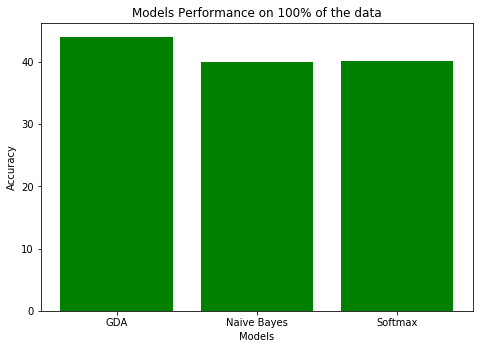

In [234]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models, accuracies_100, color = 'green')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Models Performance on 100% of the data')
plt.show()

## Final think

We implemented 3  models from scratch to classify the rating on drug reviews to see which model while perform best. Our models strugle to make prediction of the multiclasses. In general, I can say that the best performance was by GDA > Softmax Regression > Naive Bayes.